# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*1 - Exploratory Data Analysis & Pre-processing*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. [Data Exploration](#2.-Data-Exploration) <br>

    2.1 [Descriptive Statistics](#2.1-Descriptive-Statistics) <br>
    
    2.2 [Duplicate Records](#2.2-Duplicate-Records) <br>
   
    2.3 [Missing Data Analysis](#2.3-Missing-Data-Analysis) <br><br>

3. [Feature Exploration](#3.-Feature-Exploration) <br>

    3.1 [Univariate Analysis](#3.1-Univariate-Analysis) <br>
    
    3.2 [Bivariate Analysis](#3.2-Bivariate-Analysis) <br><br>

4. [Data Cleaning & Preprocessing](#4.-Data-Cleaning-&-Preprocessing) <br>

    4.1 [Treating Incoherencies](#4.1-Treating-Incoherencies) <br>
    
    4.2 [Missing Values](#4.2-Missing-Values) <br>

    4.3 [Feature Engineering](#4.3-Feature-Engineering) <br>

    &emsp; 4.3.1 [Feature Creation](#4.3.1-Feature-Creation) <br>

    &emsp; 4.3.2 [Encoding](#4.3.2-Encoding) <br>

    4.4 [Outliers](#4.4-Outliers) <br>

    &emsp; 4.4.1 [Univariate Outliers](#4.4.1-Univariate-Outliers) <br>

    &emsp; 4.4.2 [Multivariate Outliers](#4.4.2-Multivariate-Outliers) <br>

    4.5 [Feature Selection](#4.5-Feature-Selection) <br>

    &emsp; 4.5.1 [Dropping Features](#4.5.1-Dropping-Features) <br>

    4.6 [Data Exploration](#4.6-Data-Exploration)<br>

    &emsp; 4.6.1 [Univariate Analysis](#4.6.1-Univariate-Analysis) <br>

    &emsp; 4.6.2 [Bivariate Analysis](#4.6.2-Bivariate-Analysis) <br> 

# 1. Import Libraries & Data

In [1]:
# Data Handling Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# from ydata_profiling import ProfileReport

# Visualisation libraries
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as mticker

import holidays

# Data Preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# Custom Functions
import functions as f
import utils as u

**Data**

In [2]:
sales_data = pd.read_csv('./data/Case2_Sales data.csv', 
                 sep = ';')
sales_data.sort_values(by="DATE")
sales_data.head()

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [3]:
test_data = pd.read_csv('data/Case2_Test Set Template.csv', 
                 sep = ';')
test_data.head()

,Month Year,Mapped_GCK,Sales_EUR
0,Mai 22,#3,NaN
1,Jun 22,#3,NaN
2,Jul 22,#3,NaN
3,Aug 22,#3,NaN
4,Sep 22,#3,NaN


In [4]:
market_data = pd.read_excel('./data/Case2_Market data.xlsx')
market_data.head()

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,Japan.1,Switzerland,Switzerland.1,United Kingdom,United Kingdom.1,United States,United States.1,Europe,Europe.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Producer Prices,Producer Prices.1,Producer Prices.2,Producer Prices.3,Producer Prices.4,Producer Prices.5,production index,production index.1,production index.2,production index.3,production index.4,production index.5,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,World: Price of Base Metals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,United States: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment,China: Electrical equipment,United States: Machinery and equipment n.e.c.,World: Machinery and equipment n.e.c.,Switzerland: Machinery and equipment n.e.c.,United Kingdom: Machinery and equipment n.e.c.,Italy: Machinery and equipment n.e.c.,Japan: Machinery and equipment n.e.c.,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.62748,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779

#### **Production Index (Machinery & Electricals)**
| Country        | Code              |
|---------------|------------------|
| China        | MAB_ELE_PRO156    |
| France       | MAB_ELE_PRO250    |
| Germany      | MAB_ELE_PRO276    |
| Italy        | MAB_ELE_PRO380    |
| Japan        | MAB_ELE_PRO392    |
| Switzerland  | MAB_ELE_PRO756    |
| United Kingdom | MAB_ELE_PRO826  |
| United States | MAB_ELE_PRO840   |
| Europe       | MAB_ELE_PRO1100   |

#### **Shipments Index (Machinery & Electricals)**
| Country        | Code              |
|---------------|------------------|
| China        | MAB_ELE_SHP156    |
| France       | MAB_ELE_SHP250    |
| Germany      | MAB_ELE_SHP276    |
| Italy        | MAB_ELE_SHP380    |
| Japan        | MAB_ELE_SHP392    |
| Switzerland  | MAB_ELE_SHP756    |
| United Kingdom | MAB_ELE_SHP826  |
| United States | MAB_ELE_SHP840   |
| Europe       | MAB_ELE_SHP1100   |

#### **Material Prices**
| Indicator                         | Code                  |
|-----------------------------------|----------------------|
| Price of Base Metals             | RohiBASEMET1000_org  |
| Price of Energy                  | RohiENERGY1000_org   |
| Price of Metals & Minerals       | RohiMETMIN1000_org   |
| Price of Natural Gas Index       | RohiNATGAS1000_org   |
| Price of Crude Oil, Average      | RohCRUDE_PETRO1000_org |
| Price of Copper                  | RohCOPPER1000_org    |

#### **Producer Prices / Production code: Electrical Equipment**
| Country         | Producer price Code         | Production Code         |
|-----------------|------------------|------------------|
| United States   | PRI27840_org     | PRO27840_org     |
| United Kingdom  | PRI27826_org     | PRO27826_org     |
| Italy           | PRI27380_org     | PRO27380_org     |
| France          | PRI27250_org     | PRO27250_org     |
| Germany         | PRI27276_org     | PRO27276_org     |
| China           | PRI27156_org     | -                |
| World           | -                | PRO271000_org    |
| Switzerland     | -                | PRO27756_org     |
| Japan           | -                | PRO27392_org     |


#### **Production code: Machinery and Equipment**
| Country        | Code              |
|---------------|------------------|
| United States | PRO28840_org     |
| World        | PRO281000_org     |
| Switzerland  | PRO28756_org      |
| United Kingdom | PRO28826_org    |
| Italy        | PRO28380_org      |
| Japan        | PRO28392_org      |
| France       | PRO28250_org      |
| Germany      | PRO28276_org      |

#### **United States: EUR in LCU**
| Country        | Code              |
|---------------|------------------|
| United States | WKLWEUR840_org   |


# 2. Data Exploration

<a href="#top">Top &#129033;</a>

**Profiling Report**

In [5]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

## 2.1 Descriptive Statistics

<a href="#top">Top &#129033;</a>

<br>

**`Sales data`**

<br>

**2.1.1 Exploring the dataset structure with .info() method**

The `.info()` method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


With the information above, we can see the following:
- all of the columns in this dataset are categorical variables. For analysis purposes, the `DATE` column will be transformed into a date format, and the `Sales_EUR` column into a float. 
- we can also see that there might not be any missing values in any of the columns of the dataset.

Based on this, we will first change the data types of these 2 columns identified so that analysis can be proprerly made.

In [7]:
# Converting the DATE column to a datetime format
sales_data['DATE'] = pd.to_datetime(sales_data['DATE'], format='%d.%m.%Y')

# Converting the Sales_EUR to a numeric format
sales_data['Sales_EUR'] = pd.to_numeric(sales_data['Sales_EUR'].str.replace(',', '.'))


<br>

**2.1.2 Statistics**

By using the `describe()` method we get different statistical measurements, such as mean and standard deviation, for the various features. We will include the parameter 'all' so both statistics for numerical and categorical data appear. 

In [8]:
sales_data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
DATE,9802,NaN,NaN,NaN,2020-07-19 17:55:48.785961984,2018-10-01 00:00:00,2019-08-30 00:00:00,2020-07-26 12:00:00,2021-06-09 00:00:00,2022-04-30 00:00:00,NaN
Mapped_GCK,9802,14,#1,1179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_EUR,9802.0,NaN,NaN,NaN,272785.686663,-506381.17,0.0,0.0,0.0,41127988.02,2230789.1619


Based on this, we get the following:

- `Date`: the first recorded sales was in the 1st of October of 2018 and the last one was on the 30th of April of 2022. More or less 3 years and half of reorded sales.
- `Mapped_GCK`: seems that product #1 was selled the most (1179 times).
- `Sales_EUR`: The average sales value is approximately 272,785.69 EUR. The lowest recorded sales value is -506,381.17 EUR. A negative value suggests there were some instances of sales being recorded as refunds or returns leading to negative sales figures. 75% of the entries have sales below 0 EUR. The highest sales recorded is 41,127,988.02 EUR, which is significantly higher than the average. This is likely an outlier. The standard deviation is 2,230,789.16 EUR, which is quite high, indicating a large variability in the sales values.



<br>

**`Market data`**

Before proceeding with further analysis, we will organize this dataset's structure as it is difficult to understand at first sight. 

In [9]:
market_data.head(2)

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,Japan.1,Switzerland,Switzerland.1,United Kingdom,United Kingdom.1,United States,United States.1,Europe,Europe.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Producer Prices,Producer Prices.1,Producer Prices.2,Producer Prices.3,Producer Prices.4,Producer Prices.5,production index,production index.1,production index.2,production index.3,production index.4,production index.5,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,World: Price of Base Metals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,United States: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment,China: Electrical equipment,United States: Machinery and equipment n.e.c.,World: Machinery and equipment n.e.c.,Switzerland: Machinery and equipment n.e.c.,United Kingdom: Machinery and equipment n.e.c.,Italy: Machinery and equipment n.e.c.,Japan: Machinery and equipment n.e.c.,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org


In [10]:
market_data.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220
Unnamed: 0,Index 2010=100 (if not otherwise noted),date,2004m2,2004m3,2004m4,2004m5,2004m6,2004m7,2004m8,2004m9,2004m10,2004m11,2004m12,2005m1,2005m2,2005m3,2005m4,2005m5,2005m6,2005m7,2005m8,2005m9,2005m10,2005m11,2005m12,2006m1,2006m2,2006m3,2006m4,2006m5,2006m6,2006m7,2006m8,2006m9,2006m10,2006m11,2006m12,2007m1,2007m2,2007m3,2007m4,2007m5,2007m6,2007m7,2007m8,2007m9,2007m10,2007m11,2007m12,2008m1,2008m2,2008m3,2008m4,2008m5,2008m6,2008m7,2008m8,2008m9,2008m10,2008m11,2008m12,2009m1,2009m2,2009m3,2009m4,2009m5,2009m6,2009m7,2009m8,2009m9,2009m10,2009m11,2009m12,2010m1,2010m2,2010m3,2010m4,2010m5,2010m6,2010m7,2010m8,2010m9,2010m10,2010m11,2010m12,2011m1,2011m2,2011m3,2011m4,2011m5,2011m6,2011m7,2011m8,2011m9,2011m10,2011m11,2011m12,2012m1,2012m2,2012m3,2012m4,2012m5,2012m6,2012m7,2012m8,2012m9,2012m10,2012m11,2012m12,2013m1,2013m2,2013m3,2013m4,2013m5,2013m6,2013m7,2013m8,2013m9,2013m10,2013m11,2013m12,2014m1,2014m2,2014m3,2014m4,2014m5,2014m6,2014m7,2014m8,2014m9,2014m10,2014m11,2014m12,2015m1,2015m2,2015m3,2015m4,2015m5,2015m6,2015m7,2015m8,2015m9,2015m10,2015m11,2015m12,2016m1,2016m2,2016m3,2016m4,2016m5,2016m6,2016m7,2016m8,2016m9,2016m10,2016m11,2016m12,2017m1,2017m2,2017m3,2017m4,2017m5,2017m6,2017m7,2017m8,2017m9,2017m10,2017m11,2017m12,2018m1,2018m2,2018m3,2018m4,2018m5,2018m6,2018m7,2018m8,2018m9,2018m10,2018m11,2018m12,2019m1,2019m2,2019m3,2019m4,2019m5,2019m6,2019m7,2019m8,2019m9,2019m10,2019m11,2019m12,2020m1,2020m2,2020m3,2020m4,2020m5,2020m6,2020m7,2020m8,2020m9,2020m10,2020m11,2020m12,2021m1,2021m2,2021m3,2021m4,2021m5,2021m6,2021m7,2021m8,2021m9,2021m10,2021m11,2021m12,2022m1,2022m2,2022m3,2022m4
China,Production Index Machinery & Electricals,MAB_ELE_PRO156,16.940704,23.711852,24.435235,23.708115,27.009138,23.590959,24.280597,25.989192,24.895962,26.774785,32.733756,21.928194,21.928194,29.649776,29.923805,32.739062,35.846714,31.002236,31.351821,33.137596,33.799609,37.686119,43.580971,28.04427,28.04427,38.417975,39.265153,41.435686,46.416657,39.703375,42.55055,45.720845,43.586796,45.881559,55.160576,36.640305,36.640305,52.255437,52.255437,52.255437,56.485078,56.485078,56.485078,59.262294,59.262294,59.262294,52.480822,48.188711,48.188711,67.963703,67.963736,67.963736,71.725136,71.725136,71.725136,69.468502,69.468502,69.468502,65.804501,50.613175,50.613175,74.091496,74.091496,74.091496,81.58876,81.58876,81.58876,85.953979,85.953979,85.953979,75.102642,68.991743,68.991743,99.298369,99.298369,99.298369,107.434637,107.434637,107.434637,113.939165,113.939165,113.939165,100.0,85.435263,85.435263,116.937031,114.768686,120.915171,133.794139,117.241201,119.544138,126.715098,122.982788,130.343078,146.173294,94.774539,94.774539,131.355311,124.18077,130.228017,146.329955,124.650784,128.604451,137.588477,134.238147,147.326328,166.24247,107.387986,107.387986,151.708238,145.884193,154.556771,164.360695,141.511119,146.885855,160.271877,158.19277,172.836906,193.875463,121.871889,121.871889,167.85657,155.53995,164.621685,182.377227,161.430097,158.133955,176.977413,169.773512,179.466411,200.586671,128.174696,128.174696,172.917789,156.704981,167.251139,190.175781,167.013154,166.902042,179.076039,173.787815,182.841997,203.037128,133.50769,133.50769,183.314817,163.145999,1

In [11]:
countries = pd.DataFrame.from_dict(u.country_data, orient='index')
countries

,Country code,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Producer Prices Electrical Equipment Code,Production Electrical Equipment Code,Production Machinery & Equipment Code,EUR in LCU
China,156,MAB_ELE_PRO156,MAB_ELE_SHP156,PRI27156_org,NaN,NaN,NaN
France,250,MAB_ELE_PRO250,MAB_ELE_SHP250,PRI27250_org,PRO27250_org,PRO28250_org,NaN
Germany,276,MAB_ELE_PRO276,MAB_ELE_SHP276,PRI27276_org,PRO27276_org,PRO28276_org,NaN
Italy,380,MAB_ELE_PRO380,MAB_ELE_SHP380,PRI27380_org,PRO27380_org,PRO28380_org,NaN
Japan,392,MAB_ELE_PRO392,MAB_ELE_SHP392,NaN,PRO27392_org,PRO28392_org,NaN
Switzerland,756,MAB_ELE_PRO756,MAB_ELE_SHP756,NaN,PRO27756_org,PRO28756_org,NaN
United Kingdom,826,MAB_ELE_PRO826,MAB_ELE_SHP826,PRI27826_org,PRO27826_org,PRO28826_org,NaN
United States,840,MAB_ELE_PRO840,MAB_ELE_SHP840,PRI27840_org,NaN,PRO28840_org,WKLWEUR840_org


In [12]:
world = pd.DataFrame(u.world_indicators, index=['World Indicators'])
world

,Base Metals Price Index,Energy Price Index,Metals & Minerals Price Index,Natural Gas Price Index,Crude Oil Average Price Index,Copper Price Index,Producer Prices Electrical Equipment Code,Production Electrical Equipment Code,Production Machinery & Equipment Code
World Indicators,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,None,PRO271000_org,PRO271000_org


We still need to get the prices for each month.

In [13]:
column_names = market_data.iloc[1] 
market_data_new = market_data[2:] 
market_data_new.columns = column_names
market_data_new.head()

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.62748,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
4,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,102.655769,85.622508,79.740802,108.732297,73.026027,108.166564,89.774031,101.715199,85.167236,54.872715,47.779013,49.423751,91.379923,42.650637,39.134854,1.1985,80.337639,80.757423,93.852425,NaN,93.440903,NaN,103.484955,100.16909,93.793535,104.965505,125.289566,105.648765,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
5,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,100.305285,85.378729,79.598021,110.6452,74.591883,108.425887,87.463813,101.275727,84.485767,51.230356,53.590898,46.468392,99.04452,47.517121,36.278433,1.2007,80.798828,80.757423,93.852425,NaN,93.546127,NaN,103.643944,99.581436,96.391954,105.885359,131.988998,101.990361,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552
6,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.10874,136.424935,110.889719,120.33292,119.61638,85.13495,79.455239,122.02096,82.343346,110.569933,97.364496,112.057197,96.963294,52.876331,50.799575,47.803913,98.636267,44.967605,35.65738,1.2138,80.91349,80.552711,93.956467,NaN,93.440903,NaN,106.062668,109.27771,98.990373,118.252278,132.988922,122.136575,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.45871,95.401802


As the date format is not properly in the right format, we will change it to be as a year and month date format.

In [14]:
market_data_new['date'] = market_data_new['date'].str.strip()
market_data_new['date'] = pd.to_datetime(market_data_new['date'], format='%Ym%m')
market_data_new['date'] = market_data_new['date'].dt.strftime('%Y-%m')
market_data_new['date'] = pd.to_datetime(market_data_new['date'])

In [15]:
market_data_new.head(2)

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004-02-01,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004-03-01,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.62748,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815


Changing the variables name for better interpretability.

In [16]:
for i in range(len(market_data_new.columns)):
    market_data_new.rename(columns={market_data_new.columns[i]: u.colums_name[i]}, inplace=True)

<br>

**2.1.1 Exploring the dataset structure with .info() method**

In [17]:
market_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 2 to 220
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     219 non-null    datetime64[ns]
 1   CHI_MC_EL_PROD           219 non-null    object        
 2   CHI_MC_EL_SHIP           219 non-null    object        
 3   FRA_MC_EL_PROD           219 non-null    object        
 4   FRA_MC_EL_SHIP           219 non-null    object        
 5   GER_MC_EL_PROD           219 non-null    object        
 6   GER_MC_EL_SHIP           219 non-null    object        
 7   ITA_MC_EL_PROD           219 non-null    object        
 8   ITA_MC_EL_SHIP           219 non-null    object        
 9   JAP_MC_EL_PROD           219 non-null    object        
 10  JAP_MC_EL_SHIP           219 non-null    object        
 11  SWI_MC_EL_PROD           218 non-null    object        
 12  SWI_MC_EL_SHIP           218 non-nul

With the information above, we can see the following:
- `date` could be set as index, since there is no duplicated date
- all of the columns in this dataset are stored as categorical variables, except `date`. Therefore, some modifications regarding data types might happen, because these columns' values represent prices and would be more appropriate to store as floats.
- we can also see that there are missing values on `SWI_MC_EL_PROD`, `SWI_MC_EL_SHIP`, `UK_MC_EL_SHIP`, `USA_MC_EL_SHIP`, `UK_EE_PRODUCER_PRICE`, `FRA_EE_PRODUCER_PRICE`, `CHI_EE_PRODUCER_PRICE`, `CHI_MC_EQ_PROD`, `WRL_EE_PROD` and `SWI_EE_PROD`. However, these missing values might be due to the fact that not all countries have, for instance, producers.

We will proceed to change the datatypes of all columns, except `date`, to float and set `date` as index.

In [18]:
market_data_new.set_index('date', inplace=True)

In [19]:
for col in market_data_new.columns:
    market_data_new[col] = market_data_new[col].astype(float)

<br>

2.1.2 Statistics

In [20]:
market_data_new.describe()

1,CHI_MC_EL_PROD,CHI_MC_EL_SHIP,FRA_MC_EL_PROD,FRA_MC_EL_SHIP,GER_MC_EL_PROD,GER_MC_EL_SHIP,ITA_MC_EL_PROD,ITA_MC_EL_SHIP,JAP_MC_EL_PROD,JAP_MC_EL_SHIP,SWI_MC_EL_PROD,SWI_MC_EL_SHIP,UK_MC_EL_PROD,UK_MC_EL_SHIP,USA_MC_EL_PROD,USA_MC_EL_SHIP,EU_MC_EL_PROD,EU_MC_EL_SHIP,WRL_BASE_METAL_PRICE,WRL_ENERGY_PRICE,WRL_METAL_MINERAL_PRICE,WRL_GAS_PRICE,WRL_AVG_OIL_PRICE,WRL_COPPER_PRICE,USA_EUR_LCU,USA_EE_PRODUCER_PRICE,UK_EE_PRODUCER_PRICE,ITA_EE_PRODUCER_PRICE,FRA_EE_PRODUCER_PRICE,GER_EE_PRODUCER_PRICE,CHI_EE_PRODUCER_PRICE,USA_MC_EQ_PROD,WRL_MC_EQ_PROD,SWI_MC_EQ_PROD,UK_MC_EQ_PROD,ITA_MC_EQ_PROD,JAP_MC_EQ_PROD,FRA_MC_EQ_PROD,GER_MC_EQ_PROD,USA_EE_PROD,WRL_EE_PROD,SWI_EE_PROD,UK_EE_PROD,ITA_EE_PROD,JAP_EE_PROD,FRA_EE_PROD,GER_EE_PROD
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,218.000000,218.000000,219.000000,201.000000,219.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,201.000000,219.000000,184.000000,219.000000,196.000000,219.000000,219.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,208.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,138.303637,138.303637,104.431918,105.316814,107.499126,114.898377,105.228363,105.735378,111.948146,112.670602,97.834543,94.784942,108.752949,95.957072,109.418255,114.160028,108.779990,110.551132,89.733341,92.558006,86.064857,103.367773,89.446520,86.344288,1.253503,102.185734,100.151243,102.164957,101.969436,103.173606,97.681389,108.668835,112.466417,99.717112,104.384938,109.486312,115.083174,109.116660,110.429205,110.902904,111.147070,94.592852,116.667327,95.450517,105.555794,96.844134,102.125494
std,78.883209,78.883209,18.918529,12.762209,11.861942,17.091571,23.509638,19.948183,15.489336,16.891947,8.241523,9.153899,12.096725,12.946170,7.891270,14.633380,11.839462,15.727859,20.810149,30.615367,21.410779,41.747371,30.736831,23.811521,0.120190,10.524079,10.549411,4.454948,2.646863,6.076401,3.235886,9.132414,12.411183,10.467987,13.222741,22.491001,17.408257,21.050102,14.351658,8.444573,12.321223,13.465043,13.205283,29.195353,12.592527,16.857775,9.959946
min,16.940704,16.940704,50.756680,64.420676,74.332913,71.787161,34.213427,45.191710,67.531940,64.372344,77.801503,74.639253,61.048022,57.462935,85.994448,79.240230,69.786633,71.158884,50.822012,31.632310,46.468392,33.992282,26.623391,35.657380,1.054300,78.969864,80.552711,93.020027,96.864647,93.230453,90.292319,83.197311,74.760971,77.952571,51.716208,33.797184,64.082432,54.416245,71.617737,91.535751,83.310173,56.832151,77.956292,34.487114,74.565520,44.829357,76.424583
25%,68.477740,68.477740,93.613505,97.452819,100.560897,103.149778,94.335162,95.985839,103.740049,103.453182,92.410183,88.221030,100.498418,86.199717,104.599964,104.596526,101.729625,98.588003,76.590541,69.928272,71.956926,72.594822,66.703971,72.382210,1.143950,97.338623,91.811668,99.054886,100.229416,98.702209,95.072836,102.844543,104.833572,92.979573,94.591602,99.741688,105.415525,96.598988,102.014969,106.617188,102.798376,90.283688,107.414430,79.168774,97.547726,84.770638,95.659645
50%,133.507690,133.507690,102.736556,106.012166,108.992290,117.428836,105.088474,107.695805,111.683015,112.597293,97.573131,94.376831,108.911029,97.868918,110.153555,115.713379,110.383833,111.954128,88.390354,86.284861,85.070217,100.285408,82.434999,88.986014,1.240000,103.883636,102.251793,103.320900,102.268677,103.437393,97.853017,109.303719,113.616623,98.051186,105.374329,112.490631,115.092228,106.395935,111.341393,109.156631,110.284397,97.620173,116.994312,88.377968,104.366326,95.823845,103.549629
75%,198.473934,198.473934,114.090851,115.030479,115.735786,127.112220,117.031701,119.836360,121.402653,121.498141,103.877063,100.736473,118.001772,105.269576,114.585399,123.419976,115.832526,121.613878,104.378371,120.720356,100.795709,119.173439,116.413879,101.730879,1.335950,105.592884,109.928352,104.

Based on this, we get the following:

1. **Production and Shipments in Machinery & Electricals**  
   - China’s production and shipment index show high variability, indicating for instance fluctuations in demand, supply chain issues, or policy impacts.
   - At some point in time, Production and Shipments was over 3 times higher than in 2010 (229% increase)
   China was producing 38% more than in 2010 and in terms of other countries it was always higher.
   - Switzerland has the lowest mean production and shipment index, compared to the other countries.
   - UK tends to produce more than export
   - Germany’s shipment index mean (114.9) is higher than its production mean (107.5), which could indicate a focus on exports or strong international demand.

3. **Material Prices**  
   - Gas prices (mean: 103.37, std: 41.74) show high volatility, likely driven by geopolitical factors and global supply-demand shocks.  
   - Copper and metal price have a lower mean (86.34) than other metals.
   - Oil prices have a high range (26.62–168.05), reflecting the impact of market cycles and demand shifts.  

4. **Producer Prices vs. Production Indices (Electrical Equipment)**  
   - Germany has the highest producer price mean (103.17), closely followed by USA (103.17) and Italy (102.16). This suggests that companies in these countries are paying more to produce goods.  
   - Switzerland’s mean producer price is lower than others (97.68).
   - On average, UK had produce more than other countries (116), followed by the USA (110).

5. **Machinery & Equipment Production Trends**  
   - Japan has the highest production mean (115.08), followed by Germany (110.90) and the U.S. (110.42), indicating a strong machinery sector production.  
   - Switzerland has the lowest production indexes (on average 99.7).

<div class="alert-danger">

# Acrescentei o que estava nos vossos notebooks

- fazer o mesmo que fiz mas para o market data
- analisar cada variável para ambos os datasets e fazer visualizações decentes

# Feature Engineering

<div class="alert-danger">

# Dependendo do modelo, podemos criar lag features, moving average,...

In [21]:
# Time Features
sales_data['Year'] = sales_data['DATE'].dt.year
sales_data['Month'] = sales_data['DATE'].dt.month
sales_data['Day'] = sales_data['DATE'].dt.day
sales_data['WeekNr'] = sales_data['DATE'].dt.isocalendar().week
sales_data['NameDayOfWeek'] = sales_data['DATE'].dt.day_name()
sales_data['DayOfWeek'] = sales_data['DATE'].dt.weekday 
# Create a weekend flag
sales_data['IsWeekend'] = sales_data['DayOfWeek'].isin([5, 6]).astype(int)
# Create a holiday flag
german_holidays = holidays.Germany(years=sales_data["DATE"].dt.year.unique())
sales_data["IsHoliday"] = sales_data["DATE"].apply(lambda x: 1 if x in german_holidays else 0)

# Explore dates with no sales

### No sales in all products

In [ ]:
sales_by_date = sales_data.groupby('DATE')['Sales_EUR'].sum().reset_index()
f.create_time_features_from_date(sales_by_date)
no_sales_by_date = sales_by_date[sales_by_date['Sales_EUR'] == 0]
print(f'There were no sales in {len(no_sales_by_date)} days.')

There were no sales in 690 days.


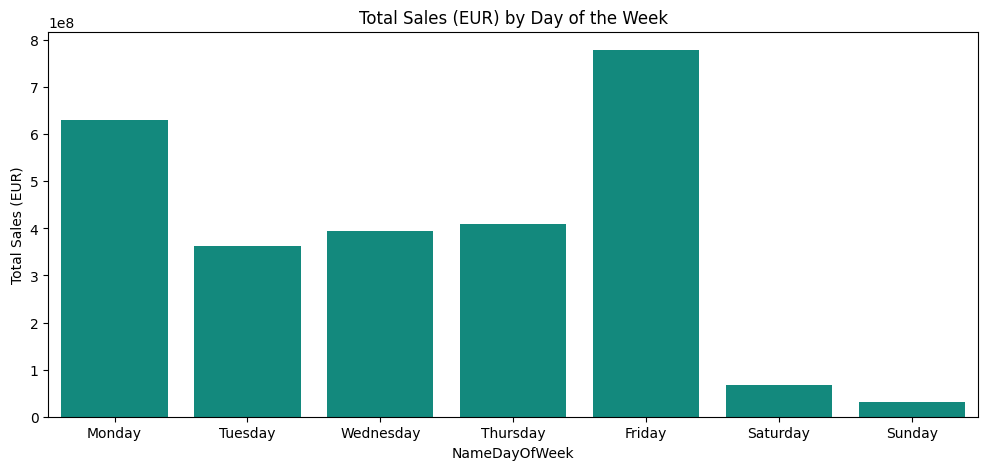

In [23]:
f.plot_total_sales_by_day_of_week(sales_by_date)

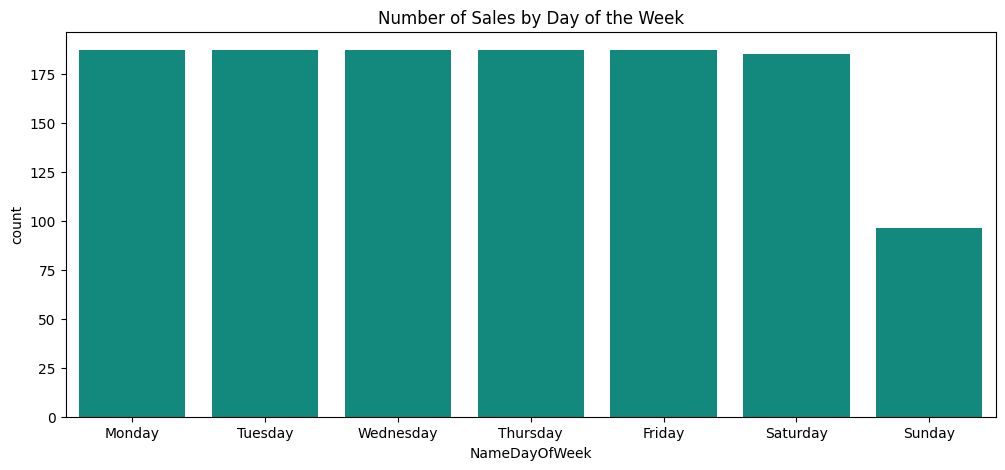

In [24]:
f.plot_nr_sales_by_day_of_week(sales_by_date)


In [ ]:
weekday_patterns = no_sales_by_date.groupby(['NameDayOfWeek']).size().reset_index(name='Count')
print("Weekday Patterns for No Sales Days:")
weekday_patterns

Common Patterns for No Sales Days:


,NameDayOfWeek,Count
0,Friday,48
1,Monday,81
2,Saturday,178
3,Sunday,93
4,Thursday,94
5,Tuesday,98
6,Wednesday,98


In [41]:
holiday_patterns = no_sales_by_date.groupby(['IsHoliday']).size().reset_index(name='Count')
print(f'There were {len(sales_by_date[sales_by_date['IsHoliday']==1])} holidays in germany during the recorded days.')
print("\nHoliday Patterns for No Sales Days:")
holiday_patterns

There were 31 holidays in germany during the recorded days.

Holiday Patterns for No Sales Days:


,IsHoliday,Count
0,0,666
1,1,24


In [ ]:
year_patterns = no_sales_by_date.groupby(['Year']).size().reset_index(name='Count')
print("Year Patterns for No Sales Days:")
year_patterns

Weekday Patterns for No Sales Days:


,Year,Count
0,2018,52
1,2019,175
2,2020,195
3,2021,205
4,2022,63


In [44]:
month_patterns = no_sales_by_date.groupby(['Month']).size().reset_index(name='Count')
print("Month Patterns for No Sales Days:")
month_patterns

Month Patterns for No Sales Days:


,Month,Count
0,1,64
1,2,56
2,3,65
3,4,63
4,5,47
5,6,49
6,7,50
7,8,49
8,9,41
9,10,88


### No sales per product

In [54]:
sales_data['DATE'].max()

Timestamp('2022-04-30 00:00:00')

In [56]:
# Find the earliest sale per product category
earliest_sale = sales_data.groupby('Mapped_GCK').min().reset_index()

# Find the latest sale per product category
latest_sale = sales_data.groupby('Mapped_GCK').max().reset_index()

# Print the results
print("Earliest Sale per Product Category:")
earliest_sale[['Mapped_GCK', 'DATE']]

Earliest Sale per Product Category:


,Mapped_GCK,DATE
0,#1,2018-10-01
1,#11,2018-10-01
2,#12,2018-10-01
3,#13,2018-10-05
4,#14,2018-10-18
5,#16,2018-10-01
6,#20,2018-10-02
7,#3,2018-10-01
8,#36,2018-10-02
9,#4,2018-10-01


In [58]:
print("Latest Sale per Product Category:")
latest_sale[['Mapped_GCK', 'DATE']]

Latest Sale per Product Category:


,Mapped_GCK,DATE
0,#1,2022-04-30
1,#11,2022-04-29
2,#12,2022-04-29
3,#13,2022-04-29
4,#14,2022-04-26
5,#16,2022-04-28
6,#20,2022-04-27
7,#3,2022-04-30
8,#36,2022-04-29
9,#4,2022-04-30


In [26]:
# Unique product groups
sorted_arr = sorted(sales_data['Mapped_GCK'].unique(), key=lambda x: int(x[1:]))
print(sorted_arr)

['#1', '#3', '#4', '#5', '#6', '#8', '#9', '#11', '#12', '#13', '#14', '#16', '#20', '#36']


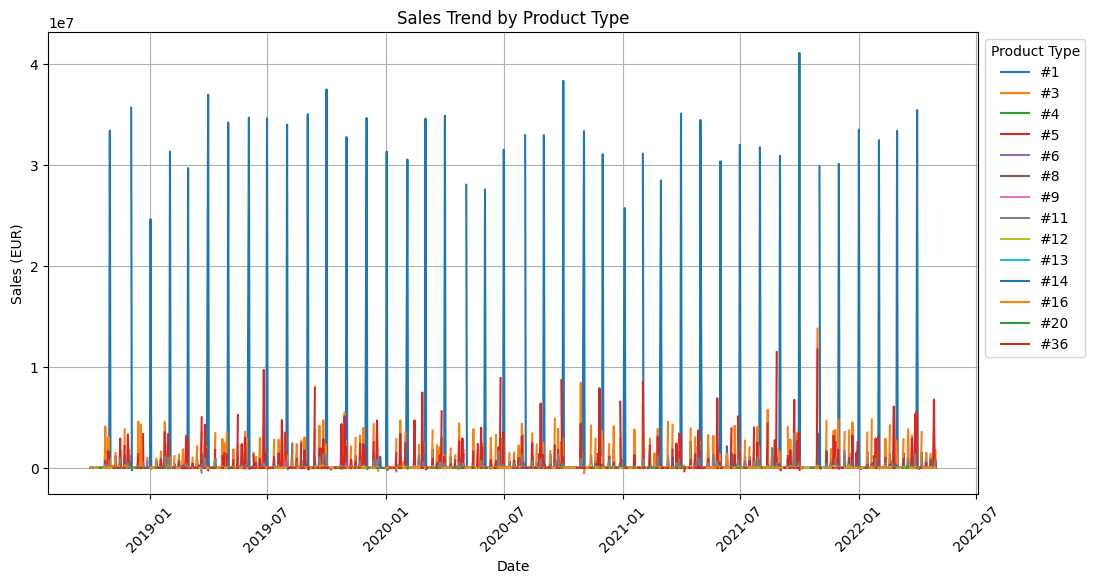

In [27]:
# Pivot, fill NaNs with 0
pivot_df = sales_data.pivot(index='DATE', columns='Mapped_GCK', values='Sales_EUR')

# Sort index (date)
pivot_df = pivot_df.sort_index()

# Plot
plt.figure(figsize=(12, 6))
for column in sorted_arr:
    plt.plot(pivot_df.index, pivot_df[column], label=str(column), marker='', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Sales (EUR)')
plt.title('Sales Trend by Product Type')
plt.legend(title='Product Type', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


In [28]:
monthly_data = sales_data.copy()
monthly_data['Year'] = monthly_data['DATE'].dt.year
monthly_data['Month'] = monthly_data['DATE'].dt.month
monthly_data.drop('DATE', axis=1, inplace=True)
monthly_data = monthly_data.groupby(['Year', 'Month', 'Mapped_GCK']).sum(numeric_only=True).reset_index()
monthly_data

,Year,Month,Mapped_GCK,Sales_EUR,Day,WeekNr,DayOfWeek,IsWeekend,IsHoliday
0,2018,10,#1,36098918.79,468,1212,75,6,1
1,2018,10,#11,1021303.50,327,799,35,0,0
2,2018,10,#12,28686.33,281,713,33,0,0
3,2018,10,#13,27666.10,176,381,20,0,0
4,2018,10,#14,5770.00,102,173,7,0,0
...,...,...,...,...,...,...,...,...,...
597,2022,4,#4,302057.04,343,323,56,3,1
598,2022,4,#5,8884607.53,343,324,49,1,1
599,2022,4,#6,333705.61,234,243,37,0,1
600,2022,4,#8,1336220.96,313,307,44,0,1


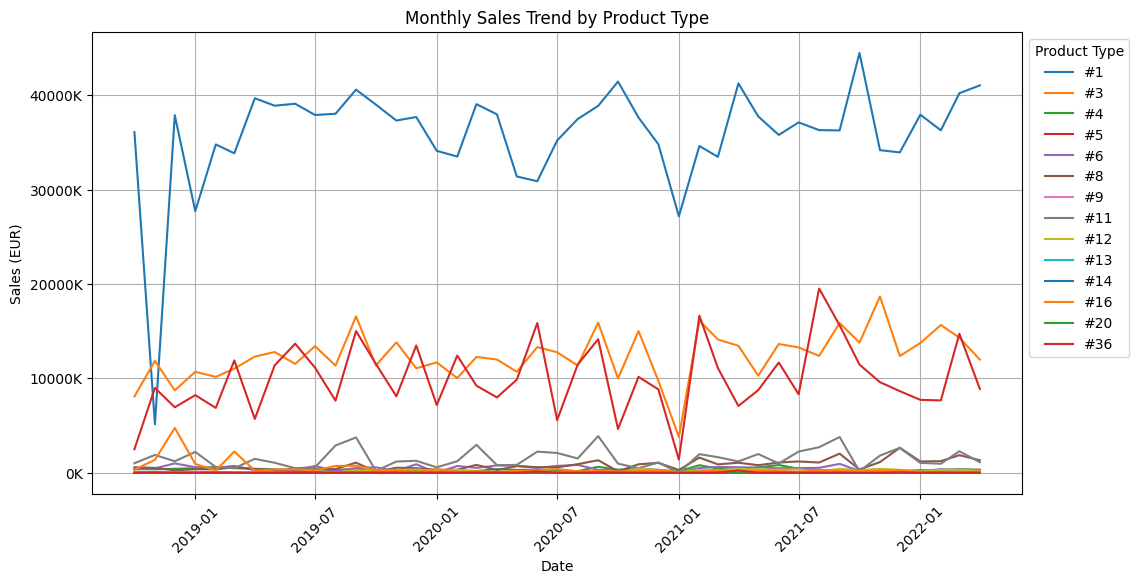

In [29]:
temp_monthly = monthly_data.copy()
temp_monthly['DATE'] = pd.to_datetime(temp_monthly[['Year', 'Month']].assign(day=1))  # Convert to first day of the month

# Pivot table for plotting
pivot_df = temp_monthly.pivot(index='DATE', columns='Mapped_GCK', values='Sales_EUR').fillna(0)

# Sort index (date)
pivot_df = pivot_df.sort_index()

# Plot
plt.figure(figsize=(12, 6))

for column in sorted_arr:
    plt.plot(pivot_df.index, pivot_df[column], label=str(column), marker='', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Sales (EUR)')
plt.title('Monthly Sales Trend by Product Type')
plt.legend(title='Product Type', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.grid(True)
plt.xticks(rotation=45)

# Format Y-axis to show real values (e.g., 10K instead of scientific notation)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))  # Adds commas (e.g., 10,000)

plt.show()